In [1]:
from src.data.data_manager import DataManager
from src.data.data_labeling import DataLabeler
from src.features.feature_engineering import BuildFeatures
from src.features.feature_selection import SelectFeatures
from src.pipelines.data_pipeline import DataPipelineFactory
from src.pipelines.train_pipeline import TrainPipelineFactory
from src.data.data_validation import validate
from hydra import initialize, compose
import polars as pl
from omegaconf.omegaconf import OmegaConf
from config.config import update_processed_data_folder
import time
import random as rd

In [2]:
initialize(version_base=None, config_path="config", job_name="test")
cfg = compose(config_name="general.yaml", return_hydra_config=True)

In [3]:
dm = DataManager(cfg)
dl = DataLabeler(cfg)

In [18]:
shares = list(OmegaConf.to_container(OmegaConf.load(cfg.paths.shares_dict)).keys())

In [39]:
# for i in range(len(shares)):
#     sh = dm.load_share(shares[i])
#     sh = sh.fill_nan(None)
#     if any((sh.null_count().to_numpy() == 1)[0]):
#         print(shares[i])
#         break

BBG000RJWGC4


In [4]:
sh = dm.load_share('BBG000RJWGC4')

In [5]:
len(sh)

318

In [6]:
sh, labels = dl.fit(sh)

In [7]:
print(len(sh), len(labels[labels == 1]))

278 9


In [8]:
sh = validate(sh)

In [9]:
sh.fill_nan(None).null_count()

time,buyers_count,buyers_quantity,sellers_count,sellers_quantity,price_min,price_max,price_std,price_last,bids_min,bids_max,bids_std,bids_last,asks_min,asks_max,asks_std,asks_last,weighted_bid_min,weighted_bid_max,weighted_bid_std,weighted_bid_last,weighted_ask_min,weighted_ask_max,weighted_ask_std,weighted_ask_last,bid_to_ask_ratio_min,bid_to_ask_ratio_max,bid_to_ask_ratio_std,bid_to_ask_ratio_last
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
import matplotlib.pyplot as plt

In [14]:
a = 160

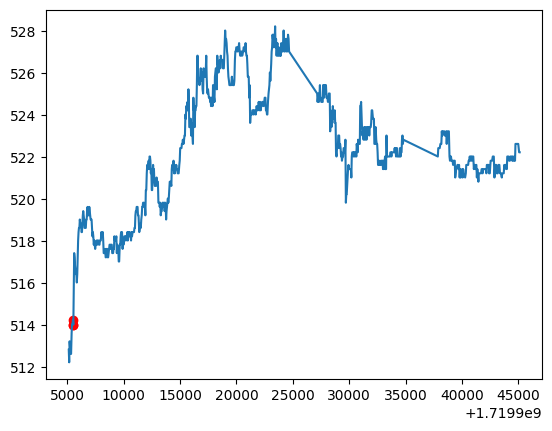

In [16]:
plt.plot(sh['time'].to_numpy()[a:], sh['price_last'].to_numpy()[a:])
plt.scatter(sh['time'].to_numpy()[labels==1], sh['price_last'].to_numpy()[labels==1], color='r')

In [5]:
import logging

In [6]:
logger = logging.getLogger()

In [2]:
initialize(version_base=None, config_path="config", job_name="test")
cfg = compose(config_name="general.yaml", return_hydra_config=True)

In [11]:
update_processed_data_folder(cfg)

In [3]:
dm = DataManager(cfg)

In [6]:
sh = dm.load_share('TCS00A106YF0')

In [18]:
dp = DataPipelineFactory.create_offline_pipeline(cfg)
tp = TrainPipelineFactory.create_ml_pipeline(cfg)

In [19]:
sh = dp.transform(sh, 'BBG000RJWGC4')

In [20]:
sh

time,buyers_count,buyers_quantity,sellers_count,sellers_quantity,price_min,price_max,price_std,price_last,bids_min,bids_max,bids_std,bids_last,asks_min,asks_max,asks_std,asks_last,weighted_bid_min,weighted_bid_max,weighted_bid_std,weighted_bid_last,weighted_ask_min,weighted_ask_max,weighted_ask_std,weighted_ask_last,bid_to_ask_ratio_min,bid_to_ask_ratio_max,bid_to_ask_ratio_std,bid_to_ask_ratio_last,buy_sell_quantity_ratio,slope
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.7198e9,0.0,0.0,2.0,9.0,72.12,72.12,0.0,72.12,315.0,328.0,4.558016,316.0,49.0,56.0,2.118914,56.0,72.06405,72.07778,0.005921,72.07778,72.404,72.4437,0.013361,72.42643,5.64286,6.42857,0.23232,5.64286,0.0,0.0
1.7198e9,0.0,0.0,2.0,40.0,72.12,72.12,0.0,72.12,263.0,375.0,36.494577,267.0,34.0,56.0,6.244998,54.0,72.06899,72.09814,0.00908,72.06899,72.35565,72.43571,0.021354,72.38148,4.94444,10.73529,1.341577,4.94444,0.0,0.0
1.7198e9,1.0,1.0,0.0,0.0,72.12,72.12,0.0,72.12,256.0,264.0,2.231232,263.0,36.0,62.0,6.708204,57.0,72.06821,72.07583,0.002511,72.06821,72.33167,72.42548,0.020401,72.3814,4.24194,7.33333,0.758161,4.61404,1.0,0.0
1.7198e9,5.0,5.0,5.0,22.0,72.14,72.32,0.080738,72.14,246.0,275.0,6.358669,260.0,41.0,72.0,5.712037,60.0,72.05505,72.10016,0.008921,72.06846,72.36758,72.50441,0.026727,72.36967,3.55556,6.39024,0.510884,4.33333,0.227273,0.0
1.7198e9,1.0,1.0,0.0,0.0,72.12,72.12,0.0,72.12,254.0,279.0,5.722096,267.0,53.0,64.0,3.880486,63.0,72.05404,72.07409,0.005334,72.0576,72.36857,72.41869,0.016684,72.37841,4.14286,5.13208,0.302656,4.2381,1.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1.7199e9,0.0,0.0,13.0,48.0,71.02,71.02,0.0,71.02,55.0,59.0,1.054267,58.0,99.0,142.0,6.944821,134.0,70.88691,70.90517,0.00408,70.90069,71.47274,71.61563,0.027609,71.52254,0.39855,0.55556,0.026309,0.43284,0.0,-0.005195
1.7199e9,0.0,0.0,3.0,16.0,71.0,71.0,0.0,71.0,44.0,45.0,0.28748,45.0,76.0,141.0,15.143716,136.0,70.85864,70.86933,0.003765,70.86933,71.33662,71.5995,0.044295,71.49765,0.31206,0.57895,0.053126,0.33088,0.0,0.0
1.7199e9,1.0,1.0,0.0,0.0,71.0,71.0,0.0,71.0,42.0,44.0,0.24913,42.0,87.0,139.0,16.291813,113.0,70.85535,70.86372,0.003741,70.86,71.29609,71.48955,0.050516,71.36761,0.30935,0.49425,0.054332,0.37168,1.0,0.0


In [10]:
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from src.model.loss import cross_entropy_loss
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from src.model.baseline import LinearNN
import polars as pl

In [55]:
def train(model, data, labels, device='cpu', monitor=None, batch_size=20, test_size=0.3, random_state=42, shuffle=True):
    data_train, data_val, labels_train, labels_val = train_test_split(data, labels, test_size=test_size, random_state=random_state, shuffle=shuffle, stratify=labels)

    data_train = data_train.to_numpy()
    labels_train = labels_train.to_numpy()

    data_val = data_val.to_numpy()
    labels_val = labels_val.to_numpy()
    train_dataset = TensorDataset(torch.tensor(data_train, dtype=torch.float32), torch.tensor(labels_train, dtype=torch.long))
    val_dataset = TensorDataset(torch.tensor(data_val, dtype=torch.float32), torch.tensor(labels_val, dtype=torch.long))

    train_loader = DataLoader(train_dataset, batch_size=batch_size)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(100):
        for data, label in train_loader:
            data, labels = data.to(device), label.to(device).squeeze(-1)
            optimizer.zero_grad()
            output, preds = model(data)
            loss = cross_entropy_loss(output, label)
            loss.backward()
            optimizer.step()
        print(loss)
    

In [56]:
labels = pl.Series(labels)

In [57]:
model = LinearNN(29, 3, 3)

In [58]:
train(model, sh, labels)

tensor(13360170., grad_fn=<NllLossBackward0>)
tensor(8008598.5000, grad_fn=<NllLossBackward0>)
tensor(3346149.5000, grad_fn=<NllLossBackward0>)
tensor(1.2429, grad_fn=<NllLossBackward0>)
tensor(1.2316, grad_fn=<NllLossBackward0>)
tensor(1.2200, grad_fn=<NllLossBackward0>)
tensor(1.2088, grad_fn=<NllLossBackward0>)
tensor(1.1979, grad_fn=<NllLossBackward0>)
tensor(1.1871, grad_fn=<NllLossBackward0>)
tensor(1.1765, grad_fn=<NllLossBackward0>)
tensor(1.1659, grad_fn=<NllLossBackward0>)
tensor(1.1555, grad_fn=<NllLossBackward0>)
tensor(1.1451, grad_fn=<NllLossBackward0>)
tensor(1.1348, grad_fn=<NllLossBackward0>)
tensor(1.1246, grad_fn=<NllLossBackward0>)
tensor(1.1144, grad_fn=<NllLossBackward0>)
tensor(1.1043, grad_fn=<NllLossBackward0>)
tensor(1.0943, grad_fn=<NllLossBackward0>)
tensor(1.0843, grad_fn=<NllLossBackward0>)
tensor(1.0744, grad_fn=<NllLossBackward0>)
tensor(1.0646, grad_fn=<NllLossBackward0>)
tensor(1.0549, grad_fn=<NllLossBackward0>)
tensor(1.0452, grad_fn=<NllLossBackward